<a href="https://colab.research.google.com/github/MinhNhata/BTVN_1_19146227_MinhNhat/blob/main/ANN_MINIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
from keras.datasets import mnist
(train_images, train_labels),(test_images, test_labels)=mnist.load_data()

train_images.shape,test_images.shape,train_labels.shape,test_labels.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

so nay la 4


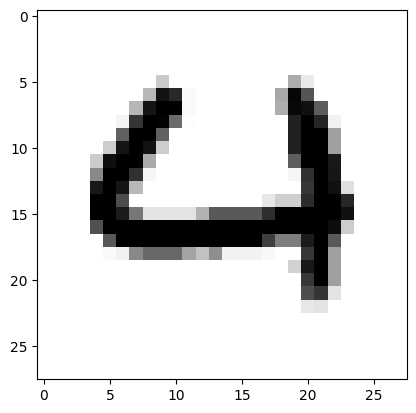

In [38]:
hinh = train_images[60]
import matplotlib.pyplot as plt
plt.imshow(hinh, cmap = plt.cm.binary)
plt.show
print('so nay la', train_labels[60])

<ipython-input-3-8a7cf7feae3b>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,5,i+1)


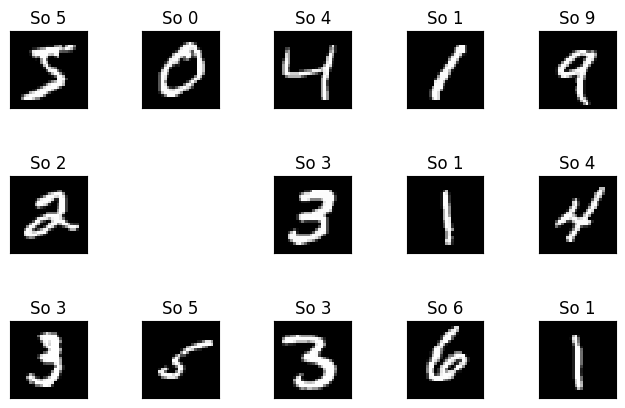

In [ ]:
for i in range(15):
  plt.subplot(3,5,i+1)
  plt.tight_layout()
  plt.imshow(train_images[i], cmap = 'gray', interpolation= 'none')
  plt.title('So {}'.format(train_labels[i]))
  plt.xticks([])
  plt.yticks([])


In [ ]:
from keras import models
from keras.layers import Dense

#from keras.models import Sequential

model = models.Sequential()


model.add(Dense(512,activation='relu', input_shape = (28*28,), name='Lop1'))
model.add(Dense(10, activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Lop1 (Dense)                (None, 512)               401920    
                                                                 
 dense (Dense)               (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32')/255
test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32')/255

from keras.utils import to_categorical #ma hoa One hot encoding
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)


In [ ]:
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.fit(train_images, train_labels, epochs= 10, batch_size= 128)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Do chinh xac tren tap kiem tra', test_acc)
print('Ham mat mat tren tap kiem tra', test_loss)

Epoch 1/10
469/469 [==============================] - 6s 10ms/step - loss: 0.2608 - accuracy: 0.9253
Epoch 2/10
469/469 [==============================] - 6s 12ms/step - loss: 0.1069 - accuracy: 0.9686
Epoch 3/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0706 - accuracy: 0.9791
Epoch 4/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0513 - accuracy: 0.9851
Epoch 5/10
469/469 [==============================] - 5s 12ms/step - loss: 0.0380 - accuracy: 0.9892
Epoch 6/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0285 - accuracy: 0.9916
Epoch 7/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0217 - accuracy: 0.9936
Epoch 8/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0163 - accuracy: 0.9957
Epoch 9/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0132 - accuracy: 0.9964
Epoch 10/10
313/313 [==============================] - 2s 5ms/step - loss: 0.0659 - accurac

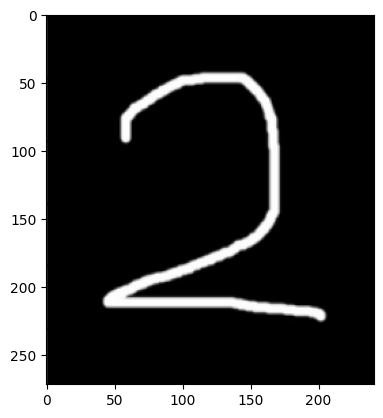

In [ ]:
from keras.utils import load_img
url = '/content/so2.png'
img = load_img(url)
plt.imshow(img)

1/1 [==============================] - 0s 73ms/step
so du doan la :  2


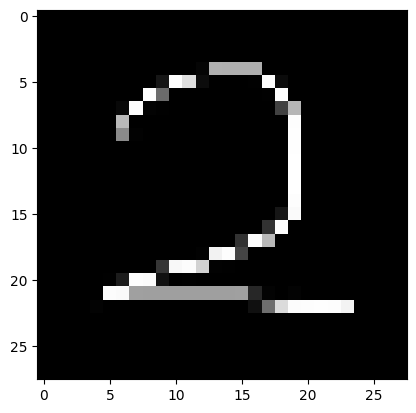

In [ ]:
from keras.utils import load_img, img_to_array
import numpy as np
img = load_img(url, target_size = (28,28), color_mode = "grayscale")
plt.imshow(img, cmap='gray')
img = img_to_array(img)
img = img[:,:,0]
img = img.reshape(1,28*28)
img = img.astype('float32')
img = img/255.0    
predict_num = np.argmax(model.predict(img))
print("so du doan la : ",   predict_num)